In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import numpy as np

In [25]:
# Find pairs that are close together
def find_close_pairs(X_mds, df, threshold=0.5):
    close_pairs = []
    for i in range(len(X_mds)):
        for j in range(i+1, len(X_mds)):
            distance = np.linalg.norm(X_mds[i] - X_mds[j])
            if distance < threshold:
                close_pairs.append((df['date'].iloc[i].strftime('%Y-%m-%d'), df['date'].iloc[j].strftime('%Y-%m-%d')))
    return close_pairs

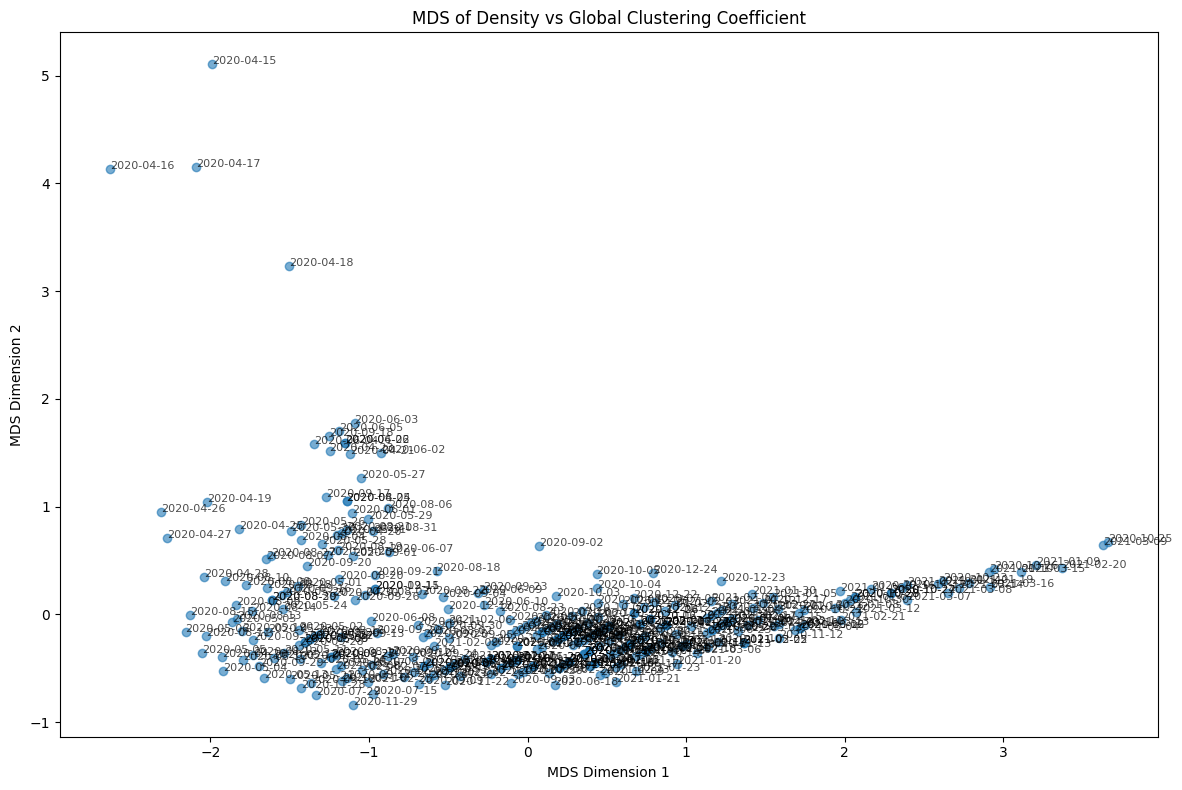

Pairs of dates with similar density and global_cc values:
2020-04-19 and 2020-04-25
2020-04-19 and 2020-04-26
2020-04-19 and 2020-04-27
2020-04-20 and 2020-04-24
2020-04-20 and 2020-05-25
2020-04-20 and 2020-05-26
2020-04-20 and 2020-05-28
2020-04-20 and 2020-05-29
2020-04-20 and 2020-05-30
2020-04-20 and 2020-05-31
2020-04-20 and 2020-06-01
2020-04-20 and 2020-06-07
2020-04-20 and 2020-08-04
2020-04-20 and 2020-08-05
2020-04-20 and 2020-08-06
2020-04-20 and 2020-08-19
2020-04-20 and 2020-08-20
2020-04-20 and 2020-08-21
2020-04-20 and 2020-08-27
2020-04-20 and 2020-08-31
2020-04-20 and 2020-09-01
2020-04-20 and 2020-09-17
2020-04-20 and 2020-09-20
2020-04-20 and 2020-09-21
2020-04-21 and 2020-04-22
2020-04-21 and 2020-04-23
2020-04-21 and 2020-04-24
2020-04-21 and 2020-05-27
2020-04-21 and 2020-06-02
2020-04-21 and 2020-06-03
2020-04-21 and 2020-06-04
2020-04-21 and 2020-06-05
2020-04-21 and 2020-06-06
2020-04-21 and 2020-08-05
2020-04-21 and 2020-09-17
2020-04-21 and 2020-09-18
2020-0

In [28]:


# Read the CSV file
df_1 = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.4.csv', parse_dates=['date'])
df_2 = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.5.csv', parse_dates=['date'])
df_3 = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.6.csv', parse_dates=['date'])

# Extract density and global_cc columns
X = df_1[['density', 'global_cc']].values
Y = df_2[['density', 'global_cc']].values
Z = df_3[['density', 'global_cc']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)
Z_scaled = scaler.fit_transform(Z)

# Perform MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
Y_mds = mds.fit_transform(Y_scaled)
Z_mds = mds.fit_transform(Z_scaled)


# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_1['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (X_mds[i, 0], X_mds[i, 1]), fontsize=8, alpha=0.7)
    



plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(X_mds, df_1)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")



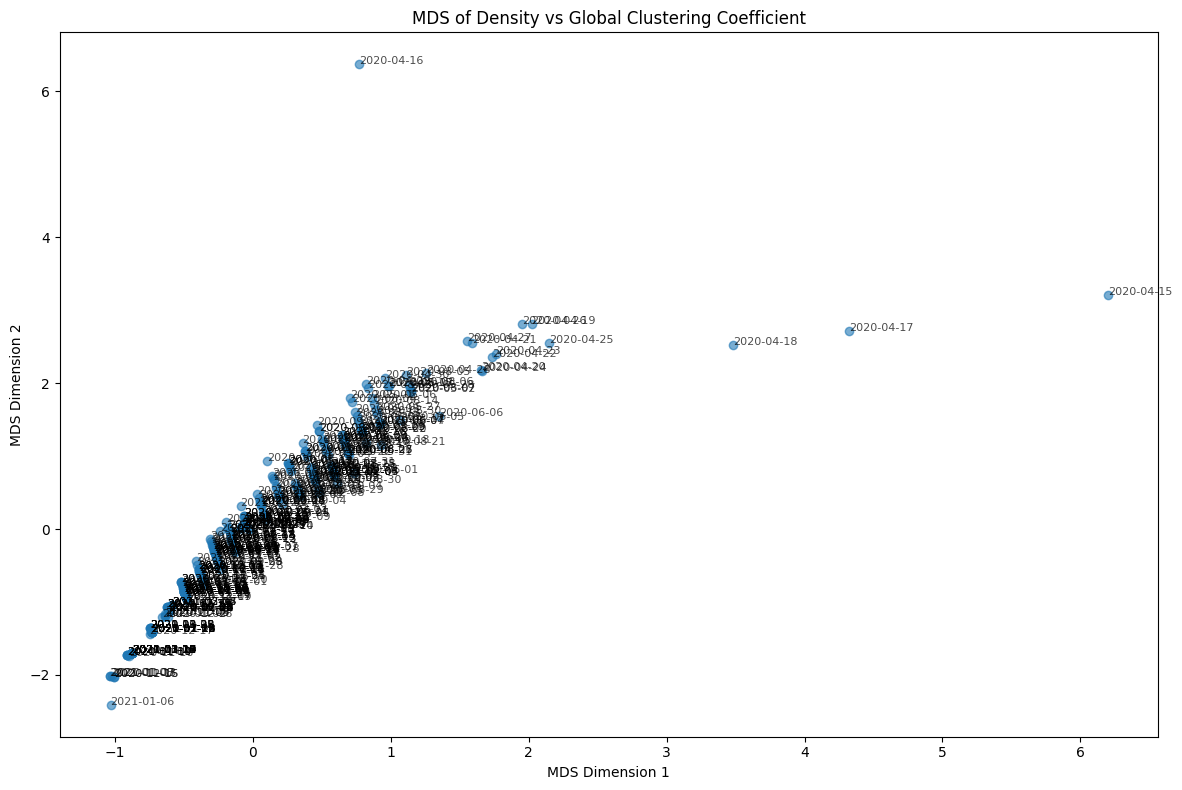

Pairs of dates with similar density and global_cc values:
2020-04-19 and 2020-04-23
2020-04-19 and 2020-04-25
2020-04-19 and 2020-04-26
2020-04-20 and 2020-04-21
2020-04-20 and 2020-04-22
2020-04-20 and 2020-04-23
2020-04-20 and 2020-04-24
2020-04-20 and 2020-04-27
2020-04-20 and 2020-04-28
2020-04-21 and 2020-04-22
2020-04-21 and 2020-04-23
2020-04-21 and 2020-04-24
2020-04-21 and 2020-04-26
2020-04-21 and 2020-04-27
2020-04-22 and 2020-04-23
2020-04-22 and 2020-04-24
2020-04-22 and 2020-04-25
2020-04-22 and 2020-04-27
2020-04-23 and 2020-04-24
2020-04-23 and 2020-04-25
2020-04-23 and 2020-04-26
2020-04-23 and 2020-04-27
2020-04-24 and 2020-04-27
2020-04-24 and 2020-04-28
2020-04-25 and 2020-04-26
2020-04-26 and 2020-04-27
2020-04-28 and 2020-04-29
2020-04-28 and 2020-04-30
2020-04-28 and 2020-05-02
2020-04-28 and 2020-05-07
2020-04-28 and 2020-05-28
2020-04-28 and 2020-08-03
2020-04-28 and 2020-08-05
2020-04-28 and 2020-08-06
2020-04-28 and 2020-08-07
2020-04-28 and 2020-08-15
2020-0

In [27]:

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_2['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (Y_mds[i, 0], Y_mds[i, 1]), fontsize=8, alpha=0.7)
    

plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(Y_mds, df_2)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")


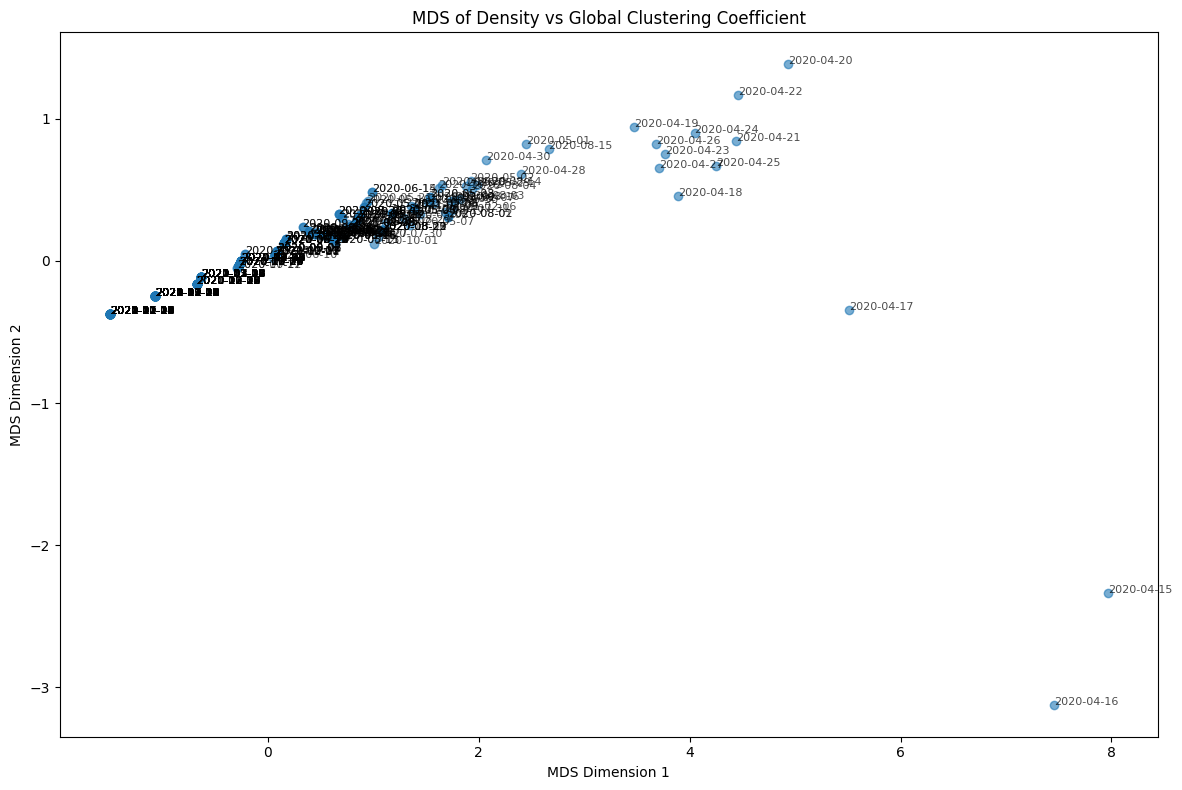

Pairs of dates with similar density and global_cc values:
2020-04-18 and 2020-04-23
2020-04-18 and 2020-04-24
2020-04-18 and 2020-04-25
2020-04-18 and 2020-04-26
2020-04-18 and 2020-04-27
2020-04-19 and 2020-04-23
2020-04-19 and 2020-04-26
2020-04-19 and 2020-04-27
2020-04-21 and 2020-04-22
2020-04-21 and 2020-04-24
2020-04-21 and 2020-04-25
2020-04-22 and 2020-04-24
2020-04-23 and 2020-04-24
2020-04-23 and 2020-04-25
2020-04-23 and 2020-04-26
2020-04-23 and 2020-04-27
2020-04-24 and 2020-04-25
2020-04-24 and 2020-04-26
2020-04-24 and 2020-04-27
2020-04-26 and 2020-04-27
2020-04-28 and 2020-04-30
2020-04-28 and 2020-05-01
2020-04-28 and 2020-05-02
2020-04-28 and 2020-08-04
2020-04-28 and 2020-08-14
2020-04-28 and 2020-08-15
2020-04-29 and 2020-04-30
2020-04-29 and 2020-05-02
2020-04-29 and 2020-05-03
2020-04-29 and 2020-05-04
2020-04-29 and 2020-05-07
2020-04-29 and 2020-05-08
2020-04-29 and 2020-05-28
2020-04-29 and 2020-05-29
2020-04-29 and 2020-05-30
2020-04-29 and 2020-06-06
2020-0

In [29]:

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(Z_mds[:, 0], Z_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_3['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (Z_mds[i, 0], Z_mds[i, 1]), fontsize=8, alpha=0.7)
    



plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(Z_mds, df_3)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")

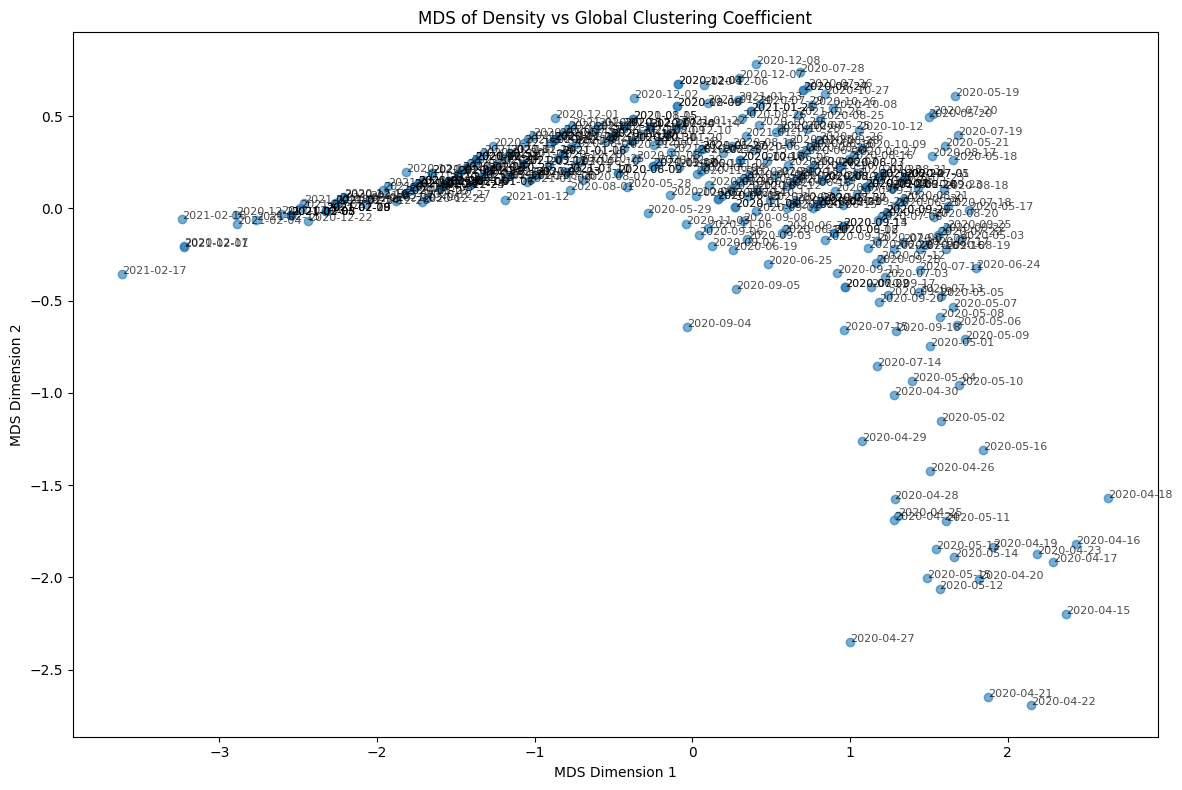

Pairs of dates with similar density and global_cc values:
2020-04-15 and 2020-04-16
2020-04-15 and 2020-04-17
2020-04-15 and 2020-04-23
2020-04-16 and 2020-04-17
2020-04-16 and 2020-04-18
2020-04-16 and 2020-04-23
2020-04-17 and 2020-04-18
2020-04-17 and 2020-04-19
2020-04-17 and 2020-04-20
2020-04-17 and 2020-04-23
2020-04-19 and 2020-04-20
2020-04-19 and 2020-04-23
2020-04-19 and 2020-05-11
2020-04-19 and 2020-05-12
2020-04-19 and 2020-05-13
2020-04-19 and 2020-05-14
2020-04-19 and 2020-05-15
2020-04-20 and 2020-04-23
2020-04-20 and 2020-05-11
2020-04-20 and 2020-05-12
2020-04-20 and 2020-05-13
2020-04-20 and 2020-05-14
2020-04-20 and 2020-05-15
2020-04-21 and 2020-04-22
2020-04-24 and 2020-04-25
2020-04-24 and 2020-04-26
2020-04-24 and 2020-04-28
2020-04-24 and 2020-04-29
2020-04-24 and 2020-05-11
2020-04-24 and 2020-05-12
2020-04-24 and 2020-05-13
2020-04-24 and 2020-05-14
2020-04-24 and 2020-05-15
2020-04-25 and 2020-04-26
2020-04-25 and 2020-04-28
2020-04-25 and 2020-04-29
2020-0

In [30]:
df_1 = pd.read_csv('../netstats/processed/RSV-netstats-threshold-0.4.csv', parse_dates=['date'])
df_2 = pd.read_csv('../netstats/processed/RSV-netstats-threshold-0.5.csv', parse_dates=['date'])
df_3 = pd.read_csv('../netstats/processed/RSV-netstats-threshold-0.6.csv', parse_dates=['date'])
# Extract density and global_cc columns
X = df_1[['density', 'global_cc']].values
Y = df_2[['density', 'global_cc']].values
Z = df_3[['density', 'global_cc']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)
Z_scaled = scaler.fit_transform(Z)

# Perform MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
Y_mds = mds.fit_transform(Y_scaled)
Z_mds = mds.fit_transform(Z_scaled)


# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_1['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (X_mds[i, 0], X_mds[i, 1]), fontsize=8, alpha=0.7)
    



plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(X_mds, df_1)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")

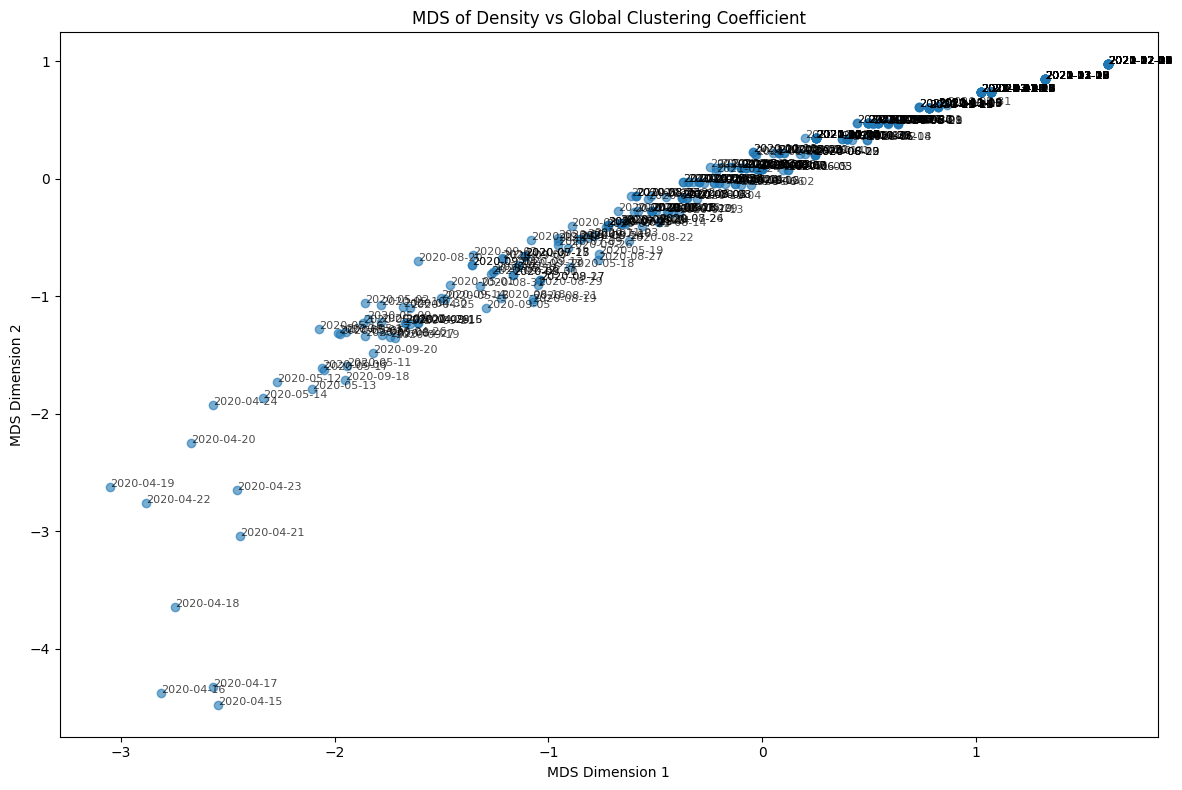

Pairs of dates with similar density and global_cc values:
2020-04-15 and 2020-04-16
2020-04-15 and 2020-04-17
2020-04-16 and 2020-04-17
2020-04-19 and 2020-04-22
2020-04-20 and 2020-04-23
2020-04-20 and 2020-04-24
2020-04-21 and 2020-04-23
2020-04-22 and 2020-04-23
2020-04-24 and 2020-05-12
2020-04-24 and 2020-05-13
2020-04-24 and 2020-05-14
2020-04-25 and 2020-04-26
2020-04-25 and 2020-04-27
2020-04-25 and 2020-04-28
2020-04-25 and 2020-04-29
2020-04-25 and 2020-04-30
2020-04-25 and 2020-05-01
2020-04-25 and 2020-05-02
2020-04-25 and 2020-05-03
2020-04-25 and 2020-05-04
2020-04-25 and 2020-05-05
2020-04-25 and 2020-05-07
2020-04-25 and 2020-05-08
2020-04-25 and 2020-05-09
2020-04-25 and 2020-05-10
2020-04-25 and 2020-05-15
2020-04-25 and 2020-05-16
2020-04-25 and 2020-05-17
2020-04-25 and 2020-08-18
2020-04-25 and 2020-08-20
2020-04-25 and 2020-08-31
2020-04-25 and 2020-09-03
2020-04-25 and 2020-09-04
2020-04-25 and 2020-09-05
2020-04-25 and 2020-09-14
2020-04-25 and 2020-09-15
2020-0

In [31]:

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_2['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (Y_mds[i, 0], Y_mds[i, 1]), fontsize=8, alpha=0.7)
    

plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(Y_mds, df_2)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")

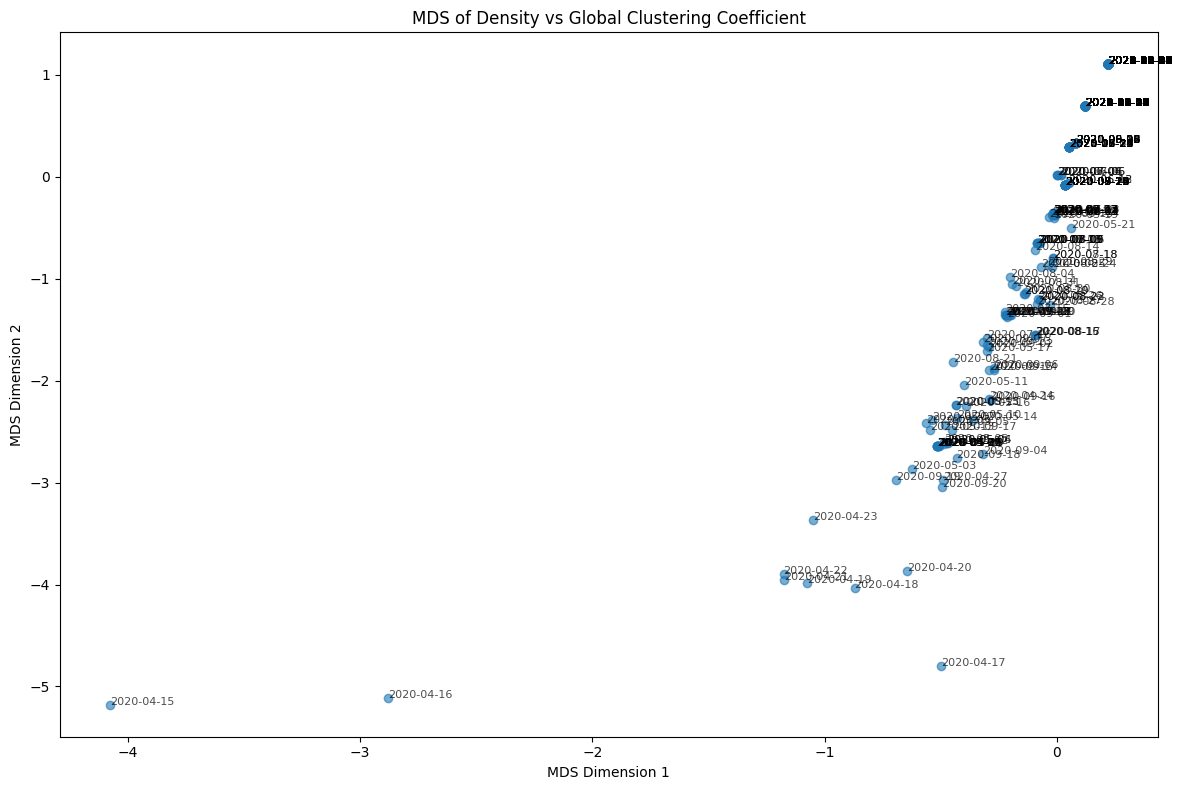

Pairs of dates with similar density and global_cc values:
2020-04-18 and 2020-04-19
2020-04-18 and 2020-04-20
2020-04-18 and 2020-04-21
2020-04-18 and 2020-04-22
2020-04-19 and 2020-04-20
2020-04-19 and 2020-04-21
2020-04-19 and 2020-04-22
2020-04-21 and 2020-04-22
2020-04-24 and 2020-05-04
2020-04-24 and 2020-05-05
2020-04-24 and 2020-05-06
2020-04-24 and 2020-05-07
2020-04-24 and 2020-05-10
2020-04-24 and 2020-05-11
2020-04-24 and 2020-05-12
2020-04-24 and 2020-05-13
2020-04-24 and 2020-05-14
2020-04-24 and 2020-05-15
2020-04-24 and 2020-05-16
2020-04-24 and 2020-05-17
2020-04-24 and 2020-08-21
2020-04-24 and 2020-09-03
2020-04-24 and 2020-09-05
2020-04-24 and 2020-09-06
2020-04-24 and 2020-09-14
2020-04-24 and 2020-09-15
2020-04-24 and 2020-09-16
2020-04-24 and 2020-09-17
2020-04-24 and 2020-09-21
2020-04-25 and 2020-04-26
2020-04-25 and 2020-04-27
2020-04-25 and 2020-04-28
2020-04-25 and 2020-04-29
2020-04-25 and 2020-04-30
2020-04-25 and 2020-05-01
2020-04-25 and 2020-05-02
2020-0

In [32]:

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(Z_mds[:, 0], Z_mds[:, 1], alpha=0.6)

# Add labels for each point
for i, date in enumerate(df_3['date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (Z_mds[i, 0], Z_mds[i, 1]), fontsize=8, alpha=0.7)
    



plt.title('MDS of Density vs Global Clustering Coefficient')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.tight_layout()
plt.show()


close_pairs = find_close_pairs(Z_mds, df_3)
print("Pairs of dates with similar density and global_cc values:")
for pair in close_pairs:
    print(f"{pair[0]} and {pair[1]}")